In [51]:
import numpy as np
import pandas as pd

In [82]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = r'D:/Academics/semester6/Machine-Leraning/Assignments/assignment-1-ml-algorithm-avengers/Mini-Project/Combined'

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = r'D:/Academics/semester6/Machine-Leraning/Assignments/assignment-1-ml-algorithm-avengers/Mini-Project/Combined/Train'

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = r'D:/Academics/semester6/Machine-Leraning/Assignments/assignment-1-ml-algorithm-avengers/Mini-Project/Combined/Test'

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING, TESTING, AND VALIDATION purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training,testing, and validation sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=4,stratify=y)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=4,stratify=y_test)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)
print("Validation data shape: ",X_val.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Training data shape:  (108, 500, 3)
Testing data shape:  (36, 500, 3)
Validation data shape:  (36, 500, 3)


## Q1

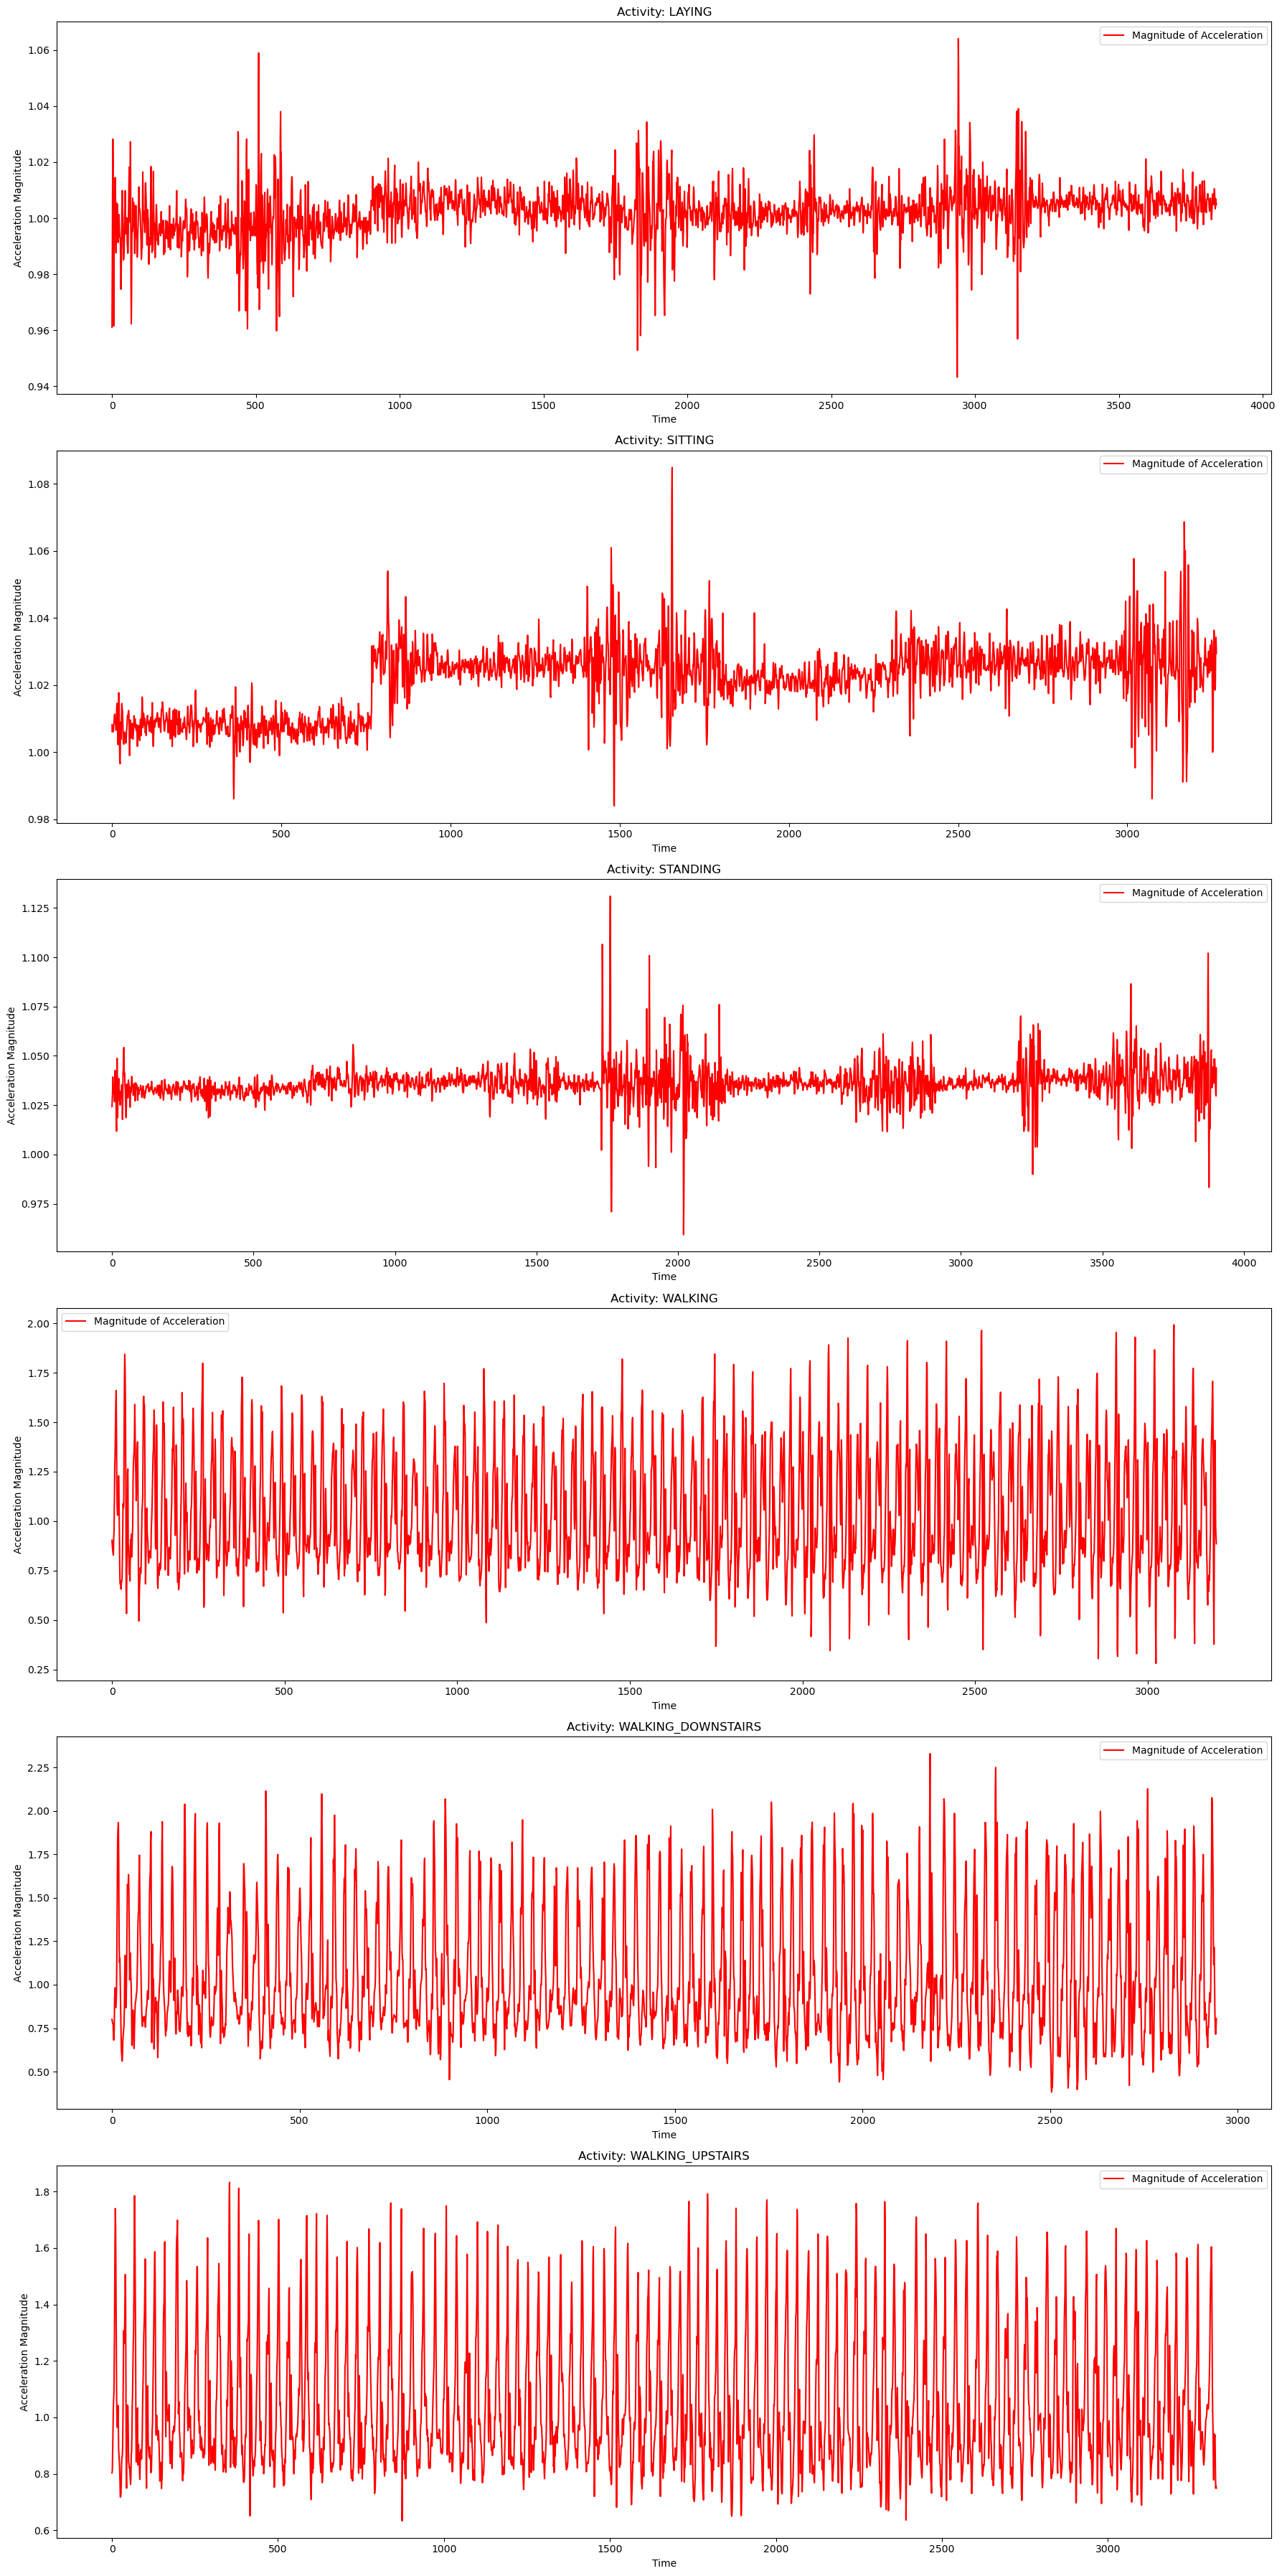

In [53]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the path to the directory structure
base_path = r'D:\Academics\semester6/Machine-Leraning/Assignments/assignment-1-ml-algorithm-avengers/Mini-Project\Combined'

# List of activities
activities = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']

# Plot each activity with subplots in a 6x1 grid
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(18, 36))

for i, activity in enumerate(activities):
    # Define the path to the activity directory
    activity_path = os.path.join(base_path, 'Test', activity)
    
    # List all CSV files in the activity directory
    csv_files = [file for file in os.listdir(activity_path) if file.endswith('.csv')]

    if csv_files:
        # Take the first CSV file
        first_csv_file = os.path.join(activity_path, csv_files[1])
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(first_csv_file)  # Modify the number of rows as needed
        
        # Calculate the magnitude of acceleration
        df['magnitude'] = np.sqrt(df['accx']**2 + df['accy']**2 + df['accz']**2)
        
        # Plot the magnitude
        axes[i].plot(df['magnitude'], label='Magnitude of Acceleration', color='red')
        axes[i].set_title(f'Activity: {activity}')
        axes[i].set_xlabel('Time')
        axes[i].set_ylabel('Acceleration Magnitude')
        axes[i].legend()

plt.tight_layout()
plt.show()


It can be infered from the graphs that the amplitudes of acceleration of static activities (Laing, Standing, Sitting) is much smaller than that of the dynamic activities (Walking, Walking Upstairs, Walking Downstairs).

The model can well differentiate / classify activities as static and dynamic only. But because of less complexity of the model, it can't differentiate the 6 activities much accurately. Since the data is time-sensored data, use of Neural Network Algorithms will be able to classify each activity.

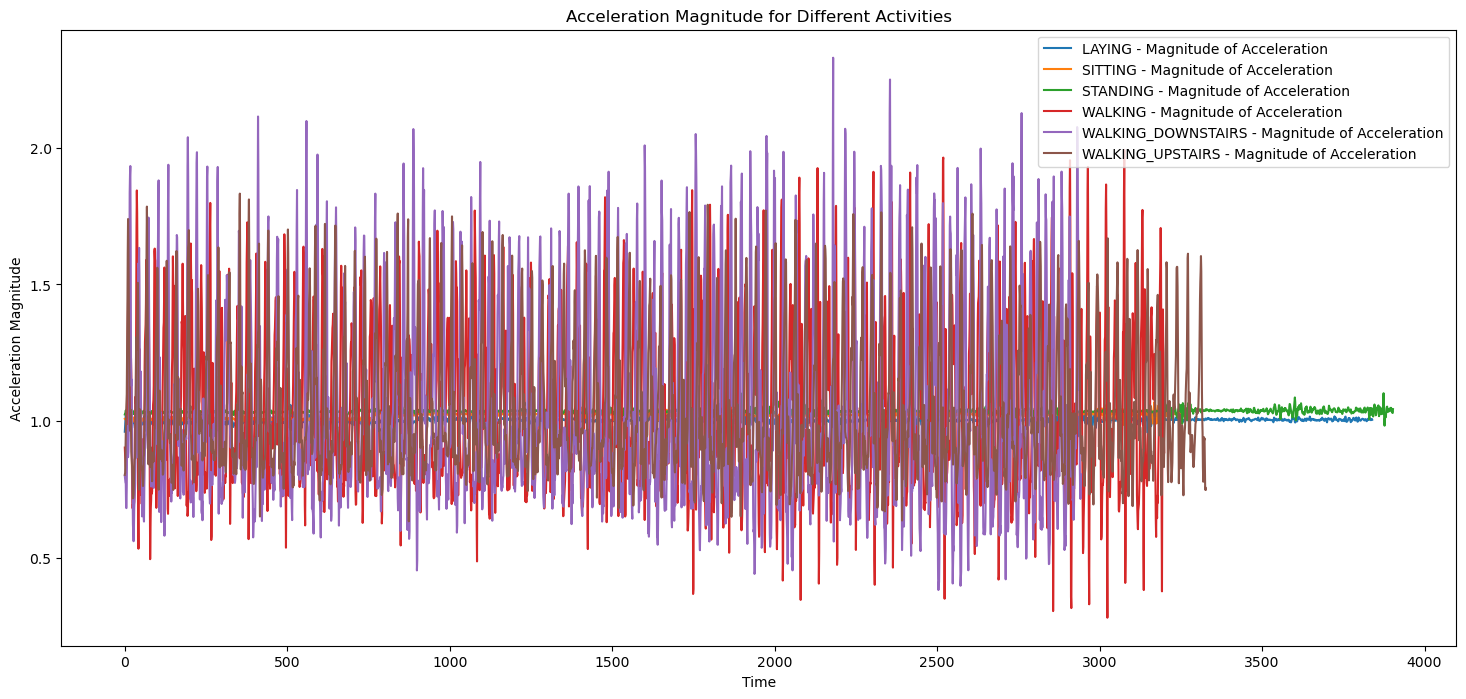

In [54]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the path to the directory structure
base_path = r'D:\Academics\semester6/Machine-Leraning/Assignments/assignment-1-ml-algorithm-avengers/Mini-Project\Combined'

# List of activities
activities = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']

# Plot all activities on a single graph
plt.figure(figsize=(18, 8))

for activity in activities:
    # Define the path to the activity directory
    activity_path = os.path.join(base_path, 'Test', activity)
    
    # List all CSV files in the activity directory
    csv_files = [file for file in os.listdir(activity_path) if file.endswith('.csv')]

    if csv_files:
        # Take the first CSV file
        first_csv_file = os.path.join(activity_path, csv_files[1])
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(first_csv_file)  # Modify the number of rows as needed
        
        # Calculate the magnitude of acceleration
        df['magnitude'] = np.sqrt(df['accx']**2 + df['accy']**2 + df['accz']**2)
        
        # Plot the magnitude with different colors for each activity
        plt.plot(df['magnitude'], label=f'{activity} - Magnitude of Acceleration')

plt.title('Acceleration Magnitude for Different Activities')
plt.xlabel('Time')
plt.ylabel('Acceleration Magnitude')
plt.legend()
plt.show()


### Q2

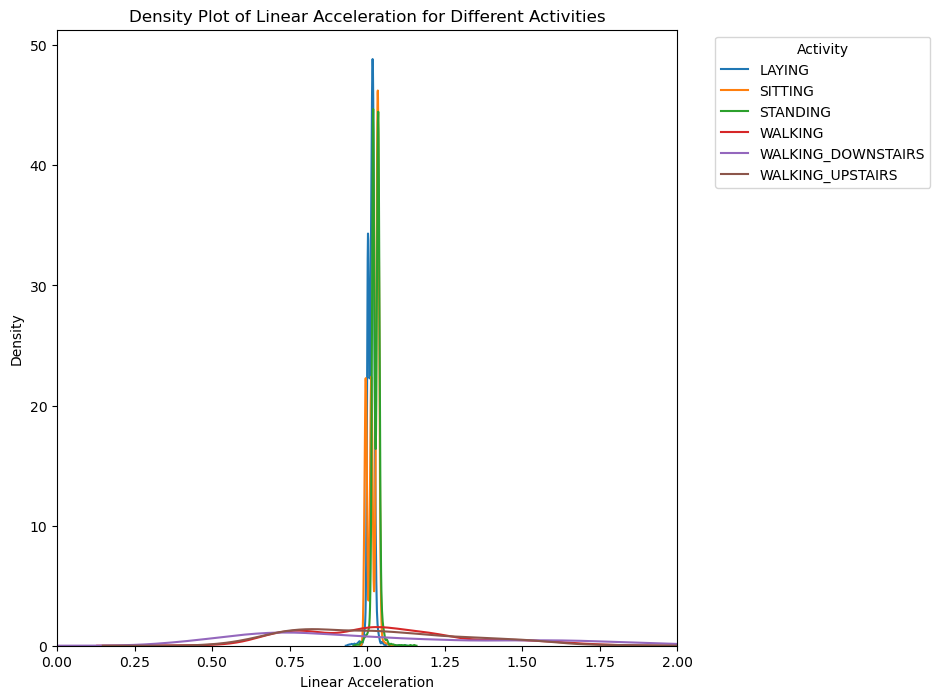

In [55]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to the directory structure
base_path = r'D:\Academics\semester6\Machine-Leraning\Assignments\assignment-1-ml-algorithm-avengers\Mini-Project\Combined'

# List of activities
activities = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']

# Plot all activities in one graph with different colors
plt.figure(figsize=(8, 8))

for activity in activities:
    # Define the path to the activity directory
    activity_path = os.path.join(base_path, 'Test', activity)
    
    # List all CSV files in the activity directory
    csv_files = [file for file in os.listdir(activity_path) if file.endswith('.csv')]
    
    if csv_files:
        # Take the first CSV file
        first_csv_file = os.path.join(activity_path, csv_files[0])
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(first_csv_file)  # Modify the number of rows as needed
        
        # Calculate linear acceleration: accx^2 + accy^2 + accz^2
        df['linear_acceleration'] = np.sqrt(df['accx']**2 + df['accy']**2 + df['accz']**2)
        
        # Plot the density plot for linear acceleration with different colors
        sns.kdeplot(data=df, x='linear_acceleration', label=activity)

plt.title('Density Plot of Linear Acceleration for Different Activities')
plt.xlabel('Linear Acceleration')
plt.ylabel('Density')
plt.legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set x-axis limits from 0 to 2
plt.xlim(0, 2)
plt.show()

## Observations

- **Static Activities (LAYING, SITTING, STANDING):**
  - Density peaks are more prominent.
    - In static activities like laying, sitting, and standing, the linear acceleration values tend to cluster within a narrower range. This results in well-defined density peaks in the waveform plot. The concentrated density signifies minimal variation in acceleration, reflecting the relatively stationary nature of these activities.
  - Indicates a concentrated range of linear acceleration values.
    - The clear density peaks observed in the waveform indicate that the majority of linear acceleration values fall within a concentrated range. This suggests that during static activities, there is limited motion or change in acceleration. The consistent and confined pattern is characteristic of stable, non-moving states.

- **Dynamic Activities (WALKING, WALKING_DOWNSTAIRS, WALKING_UPSTAIRS):**
  - Density peaks are less prominent.
    - Dynamic activities, such as walking, walking downstairs, and walking upstairs, exhibit less distinct density peaks in the waveform plot. The distribution of linear acceleration values is spread across a broader range. The reduced prominence of density peaks implies a greater variability in acceleration values, which is indicative of movement and changes in activity.
  - Indicates a broader distribution of linear acceleration values, potentially due to movement.
    - The less defined density peaks suggest a wider spread of linear acceleration values. This broader distribution is often associated with the dynamic nature of activities involving motion. In walking or climbing stairs, for example, there are continuous changes in acceleration as the body transitions between different phases of the activity. The visualization captures this dynamic characteristic in the waveform.

This visualization helps in distinguishing between static and dynamic activities based on their linear acceleration characteristics. The distinctions observed in the waveform plots provide valuable insights into the characteristics of static and dynamic activities based on linear acceleration data. By analyzing the density peaks and the distribution of acceleration values, it becomes possible to discern whether an activity is relatively stationary or involves movement. This information is crucial for developing models that can classify activities based on their acceleration patterns, contributing to applications such as activity recognition or health monitoring.

### Q3

In [56]:
# Importing DecisionTreeClassifier from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Reshape X_train, X_test to 2D arrays
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_2d, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test_2d)

# Calculate and print accuracy
accuracy_1 = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy_1)

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy on the test set: 0.5555555555555556
Confusion Matrix:
[[0 2 2 2 0 0]
 [1 3 1 0 1 0]
 [4 1 1 0 0 0]
 [0 0 0 6 0 0]
 [1 0 0 1 4 0]
 [0 0 0 0 0 6]]


Q4

Accuracy for depth 2: 0.4444444444444444
Confusion Matrix for Depth 2:
[[4 0 0 2 0 0]
 [6 0 0 0 0 0]
 [6 0 0 0 0 0]
 [0 0 0 6 0 0]
 [6 0 0 0 0 0]
 [0 0 0 0 0 6]]

Accuracy for depth 3: 0.6111111111111112
Confusion Matrix for Depth 3:
[[0 0 2 2 2 0]
 [0 0 3 0 3 0]
 [0 0 5 0 1 0]
 [0 0 0 6 0 0]
 [0 0 1 0 5 0]
 [0 0 0 0 0 6]]

Accuracy for depth 4: 0.6666666666666666
Confusion Matrix for Depth 4:
[[0 1 2 2 1 0]
 [0 3 2 0 1 0]
 [0 2 4 0 0 0]
 [0 0 0 6 0 0]
 [0 0 1 0 5 0]
 [0 0 0 0 0 6]]

Accuracy for depth 5: 0.6111111111111112
Confusion Matrix for Depth 5:
[[1 1 2 2 0 0]
 [1 3 1 0 1 0]
 [4 1 1 0 0 0]
 [0 0 0 6 0 0]
 [1 0 0 0 5 0]
 [0 0 0 0 0 6]]

Accuracy for depth 6: 0.6666666666666666
Confusion Matrix for Depth 6:
[[0 1 3 2 0 0]
 [1 3 1 0 1 0]
 [1 1 4 0 0 0]
 [0 0 0 6 0 0]
 [1 0 0 0 5 0]
 [0 0 0 0 0 6]]

Accuracy for depth 7: 0.5555555555555556
Confusion Matrix for Depth 7:
[[0 2 2 2 0 0]
 [1 3 1 0 1 0]
 [4 1 1 0 0 0]
 [0 0 0 6 0 0]
 [1 0 0 1 4 0]
 [0 0 0 0 0 6]]

Accuracy for depth 8: 

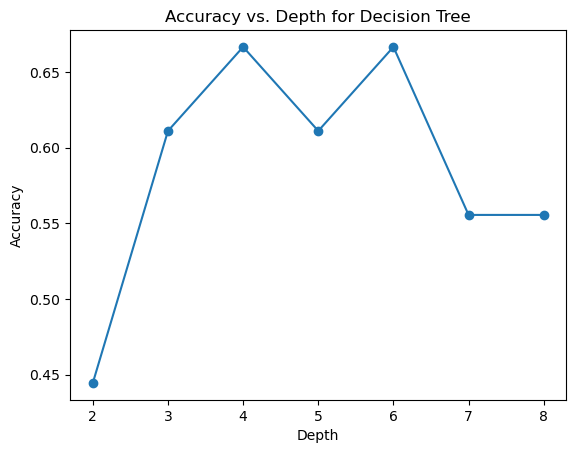

In [57]:
# Importing necessary libraries for plotting
import matplotlib.pyplot as plt

# Initialize lists to store accuracies for different depths
depths = list(range(2, 9))
accuracies = []



# Iterate over different depths
for depth in depths:
    # Train Decision Tree
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_classifier.fit(X_train_2d, y_train)

    # Predict on the test set
    y_pred = dt_classifier.predict(X_test_2d)

    # Calculate accuracy and store it
    accuracy_2 = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy_2)
    print(f"Accuracy for depth {depth}:", accuracy_2)

    # Print confusion matrix for each depth
    print(f"Confusion Matrix for Depth {depth}:")
    print(confusion_matrix(y_test, y_pred))
    print()

# Plotting accuracies vs. depths
plt.plot(depths, accuracies, marker='o')
plt.title('Accuracy vs. Depth for Decision Tree')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

Yes, as seen from the graph, the accuracy of the model changes when the depth is increased, and this is closely tied to the concepts of overfitting and underfitting.

1. Underfitting: When a model is too simple (e.g., low depth) and lacks the capacity to capture the underlying patterns in the data, it may underfit the training set. In this case, the model fails to learn the complexities present in the data, resulting in poor performance.

2. Overfitting: When a model is excessively complex (e.g., high depth), it may memorize the training data, including its noise and outliers, rather than learning the general patterns. This can lead to high accuracy on the training set but poor generalization to new, unseen data. As a result, the model fails to generalize well.

Q5

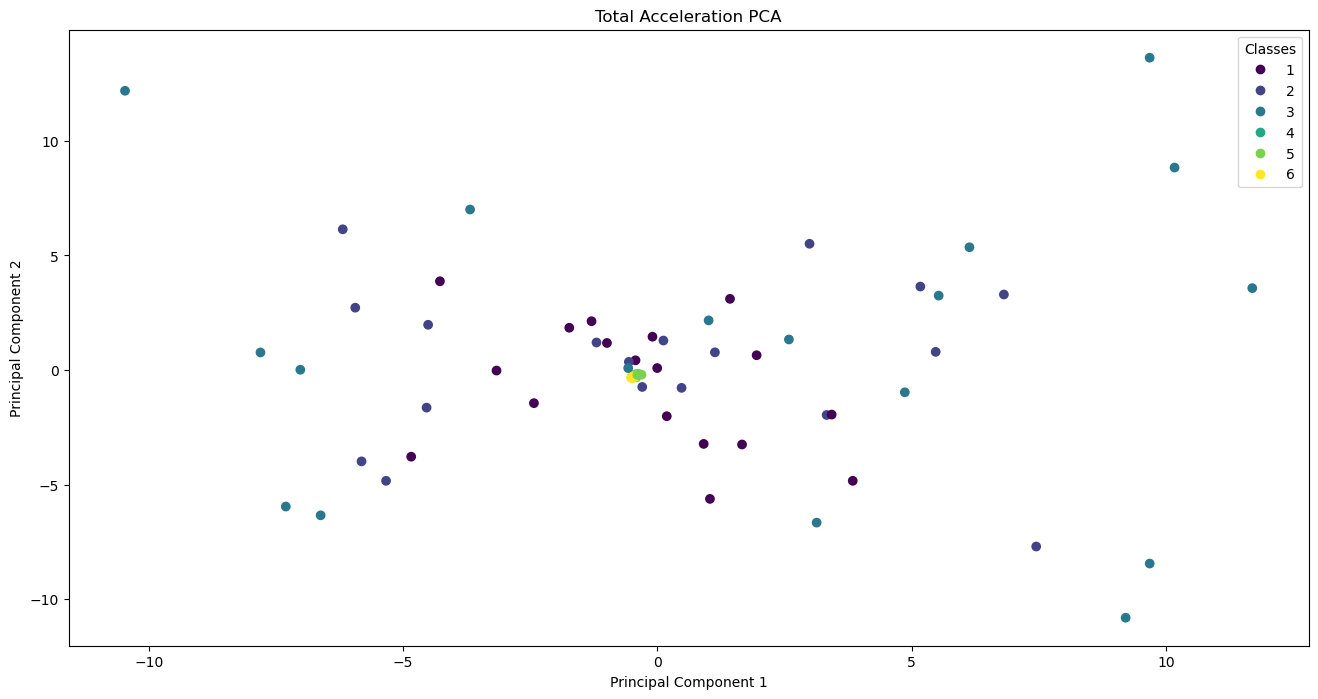

In [58]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


# Calculate total acceleration
linear_acceleration = (X_train[:, :,0]**2 + X_train[:, :,1]**2 + X_train[:, :,2]**2)
linear_acceleration_val = (X_val[:, :,0]**2 + X_val[:, :,1]**2 + X_val[:, :,2]**2)
linear_acceleration_test = (X_test[:, :,0]**2 + X_test[:, :,1]**2 + X_test[:, :,2]**2)

linear_acceleration_2d = linear_acceleration.reshape(linear_acceleration.shape[0], -1)

# Perform PCA on Total Acceleration
pca = PCA(n_components=2)
linear_acceleration_pca = pca.fit_transform(linear_acceleration_2d)

plt.figure(figsize=(16, 8))
scatter = plt.scatter(linear_acceleration_pca[:, 0], linear_acceleration_pca[:, 1], c=y_train,cmap = 'viridis')
plt.title('Total Acceleration PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title= 'Classes')
plt.show()


In [70]:
import tsfel

X_tsfe_train = np.zeros((1,8))

for i in range(len(linear_acceleration)):
    ext = []
    ext.append(tsfel.feature_extraction.features.calc_mean(linear_acceleration[i]))
    ext.append(tsfel.feature_extraction.features.pk_pk_distance(linear_acceleration[i]))
    ext.append(tsfel.feature_extraction.features.calc_max(linear_acceleration[i]))
    ext.append(tsfel.feature_extraction.features.calc_std(linear_acceleration[i]))
    ext.append(tsfel.feature_extraction.features.abs_energy(linear_acceleration[i]))
    ext.append(tsfel.feature_extraction.features.skewness(linear_acceleration[i]))
    ext.append(tsfel.feature_extraction.features.entropy(linear_acceleration[i]))
    ext.append(tsfel.feature_extraction.features.slope(linear_acceleration[i]))

    X_tsfe_train = np.vstack((X_tsfe_train,np.array(ext).reshape(1,-1)))

X_tsfe_train = X_tsfe_train[1:,:]

X_tsfe_test = np.zeros((1,8))
for i in range(len(linear_acceleration_test)):
    ext = []
    ext.append(tsfel.feature_extraction.features.calc_mean(linear_acceleration_test[i]))
    ext.append(tsfel.feature_extraction.features.pk_pk_distance(linear_acceleration_test[i]))
    ext.append(tsfel.feature_extraction.features.calc_max(linear_acceleration_test[i]))
    ext.append(tsfel.feature_extraction.features.calc_std(linear_acceleration_test[i]))
    ext.append(tsfel.feature_extraction.features.abs_energy(linear_acceleration_test[i]))
    ext.append(tsfel.feature_extraction.features.skewness(linear_acceleration_test[i]))
    ext.append(tsfel.feature_extraction.features.entropy(linear_acceleration_test[i]))
    ext.append(tsfel.feature_extraction.features.slope(linear_acceleration_test[i]))

    X_tsfe_test = np.vstack((X_tsfe_test,np.array(ext).reshape(1,-1)))

X_tsfe_test = X_tsfe_test[1:,:]

X_tsfe_val = np.zeros((1,8))
for i in range(len(linear_acceleration_val)):
    ext = []
    ext.append(tsfel.feature_extraction.features.calc_mean(linear_acceleration_val[i]))
    ext.append(tsfel.feature_extraction.features.pk_pk_distance(linear_acceleration_val[i]))
    ext.append(tsfel.feature_extraction.features.calc_max(linear_acceleration_val[i]))
    ext.append(tsfel.feature_extraction.features.calc_std(linear_acceleration_val[i]))
    ext.append(tsfel.feature_extraction.features.abs_energy(linear_acceleration_val[i]))
    ext.append(tsfel.feature_extraction.features.skewness(linear_acceleration_val[i]))
    ext.append(tsfel.feature_extraction.features.entropy(linear_acceleration_val[i]))
    ext.append(tsfel.feature_extraction.features.slope(linear_acceleration_val[i]))

    X_tsfe_val = np.vstack((X_tsfe_val,np.array(ext).reshape(1,-1)))
    
X_tsfe_val = X_tsfe_val[1:,:]




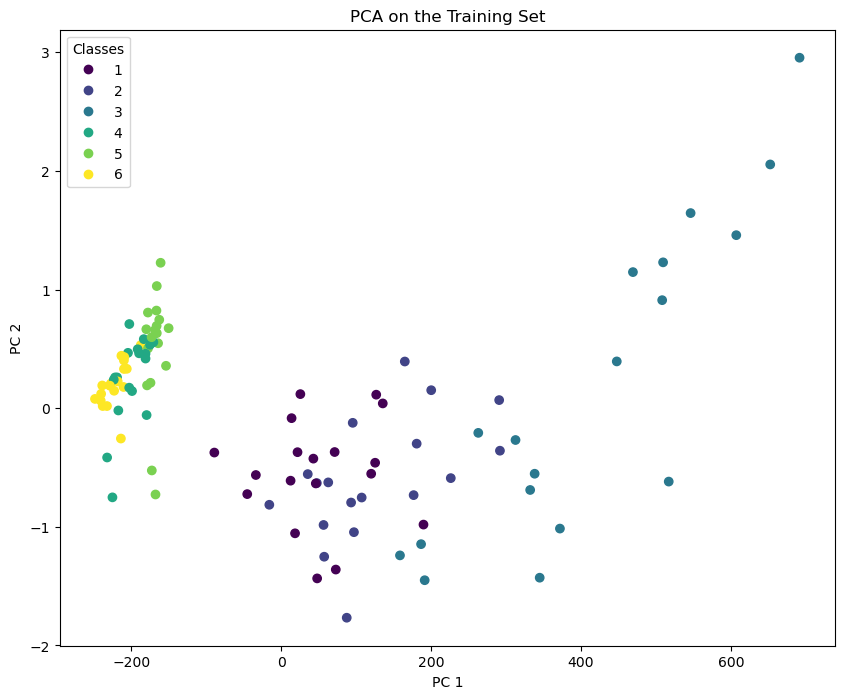

In [71]:
plt.figure(figsize=(10, 8))

pca = PCA(n_components=2)
X_pca_train_tsfe = pca.fit_transform(X_tsfe_train)

scatter = plt.scatter(X_pca_train_tsfe[:, 0], X_pca_train_tsfe[:, 1], c=y_train,cmap = 'viridis')
plt.title('PCA on the Training Set')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(*scatter.legend_elements(), title= 'Classes')
plt.show()

Yes, the scatter plot has become more comprehensive and understandable by using TSFEL library which featurizes the data and gives better results as compared to PCA. The accuracy increased on using the TSFEL library. The PCA plot had more overlapping points making it difficult to analyse the plot unlike the TSFEL plot where it was scattered giving better results.

### Q6

In [76]:
dt_tsfel_classifier = DecisionTreeClassifier(random_state=42)

dt_tsfel_classifier.fit(X_tsfe_train, y_train)

y_tsfel_pred = dt_tsfel_classifier.predict(X_tsfe_test)

accuracy = accuracy_score(y_test, y_tsfel_pred)
print("Accuracy on the test set:", accuracy)

Accuracy on the test set: 0.6388888888888888


Yes. Featurizing often works better than using raw data directly because it allows the model to focus on relevant information and reduces the dimensionality of the input space. Raw data may contain noise, redundancies, or irrelevant details that can hinder a model's ability to generalize. By extracting meaningful features, the model can capture essential patterns and relationships in the data, facilitating better learning and generalization. Featurization also helps in handling different scales and formats of data, making it more suitable for various machine learning algorithms. Overall, featurizing enhances the model's efficiency and performance by providing a more concise and informative representation of the underlying patterns in the data.

Q7

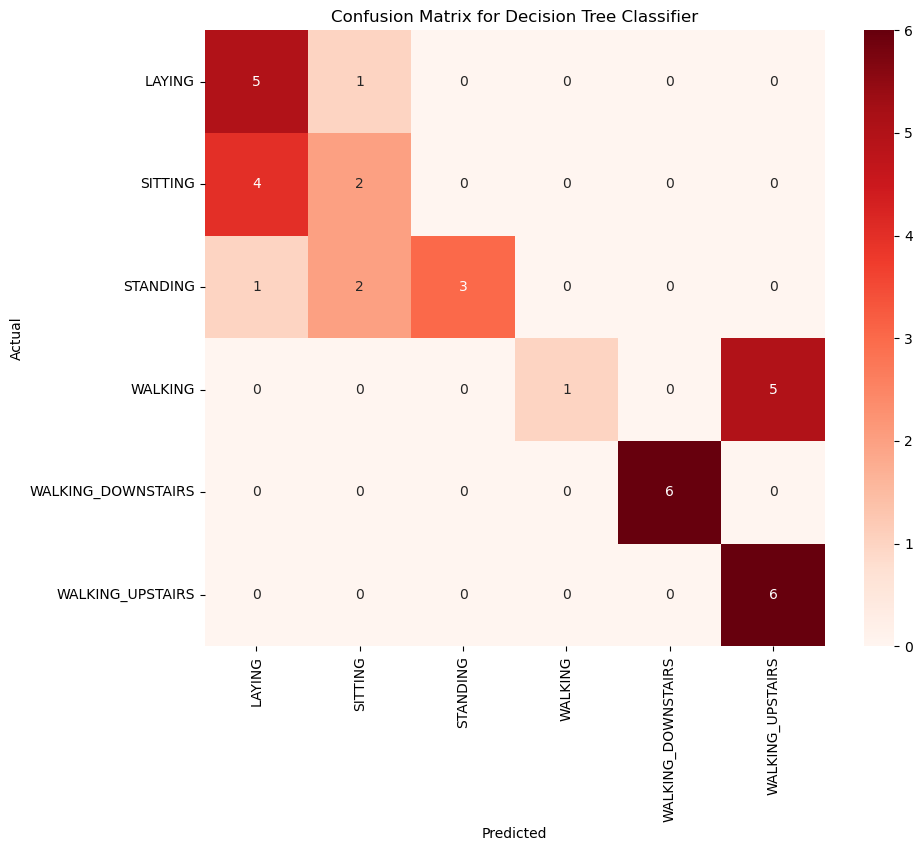

In [77]:
conf_matrix_tsfel = confusion_matrix(y_test, y_tsfel_pred)

import seaborn as sns
import matplotlib.pyplot as plt

activities = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']

plt.figure(figsize=(10,8))

sns.heatmap(conf_matrix_tsfel, annot=True, fmt='d', cmap='Reds', xticklabels=activities, yticklabels=activities)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Accuracy for depth 2: 0.6111111111111112

Accuracy for depth 3: 0.6388888888888888

Accuracy for depth 4: 0.6111111111111112

Accuracy for depth 5: 0.6944444444444444

Accuracy for depth 6: 0.6944444444444444

Accuracy for depth 7: 0.7222222222222222

Accuracy for depth 8: 0.6944444444444444



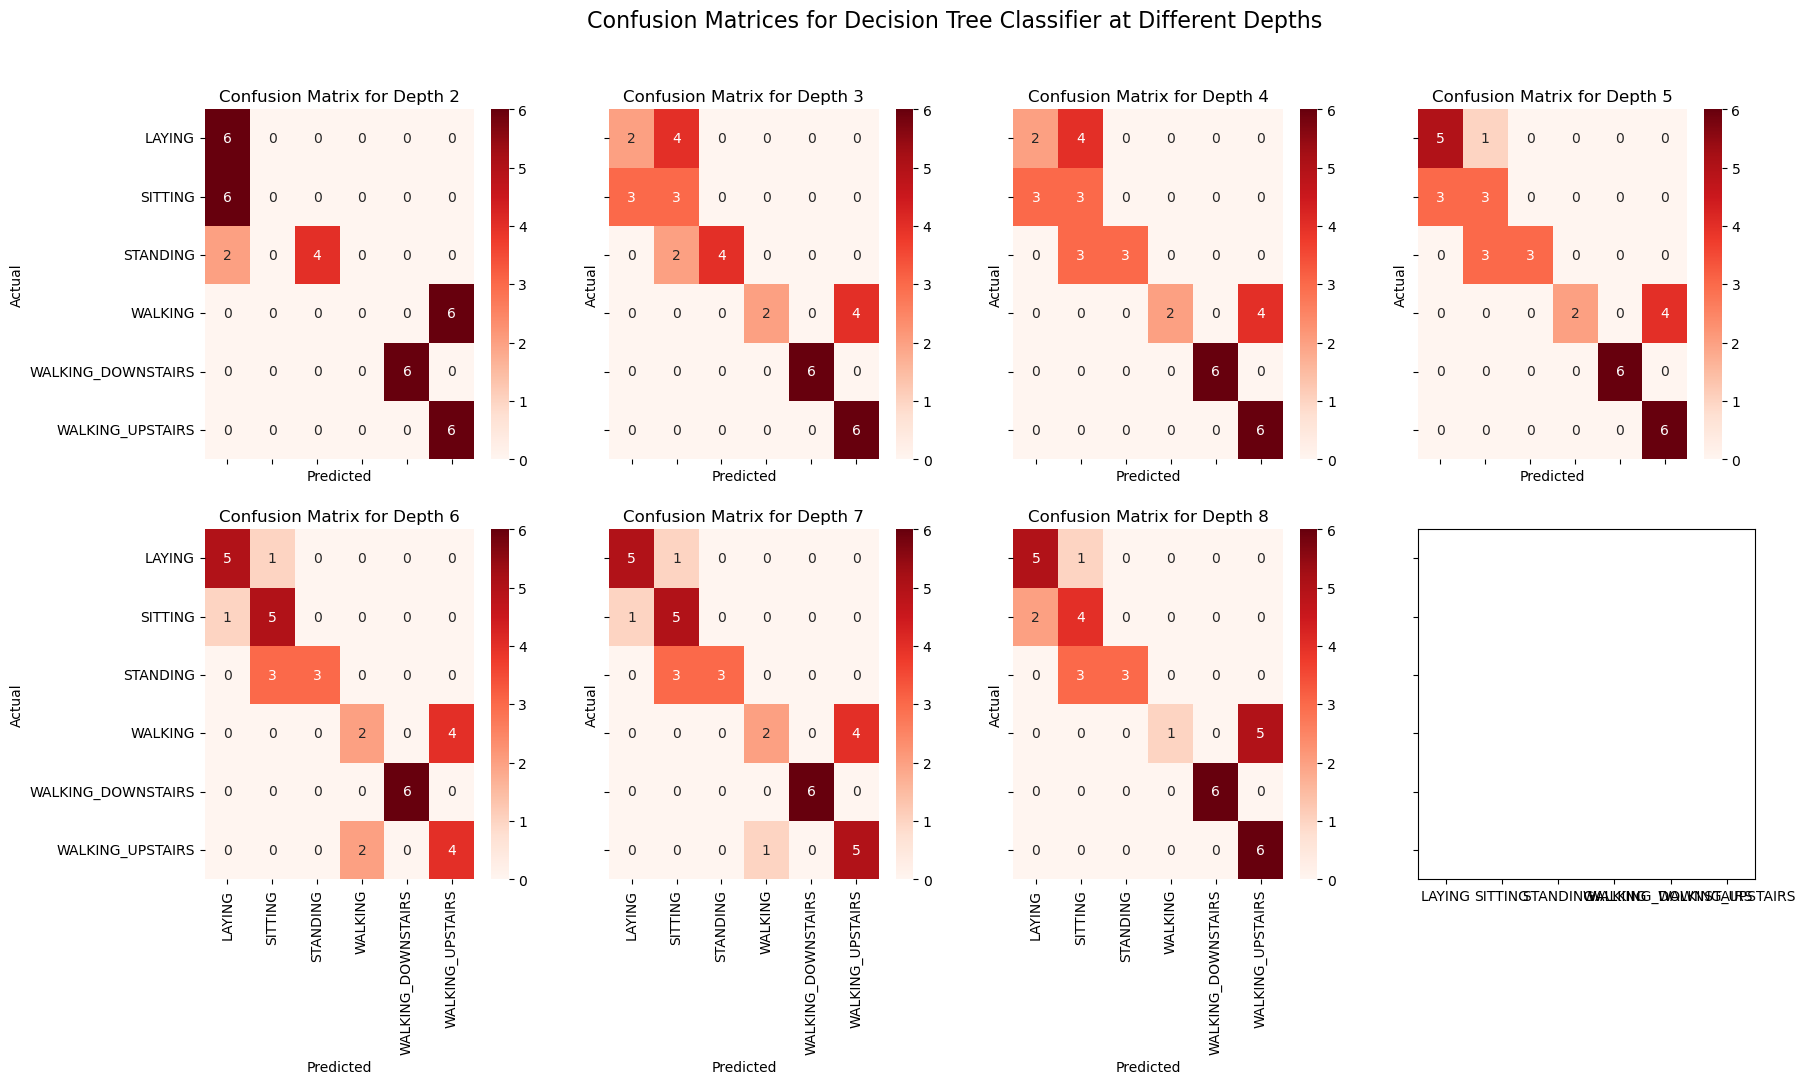

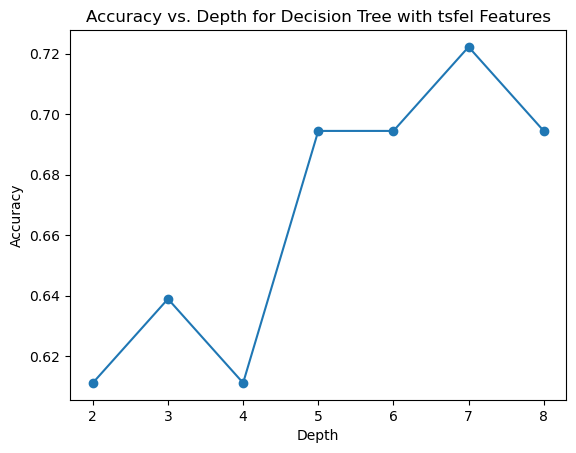

In [78]:
import tsfel
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize lists to store accuracies and confusion matrices for different depths
depths = list(range(2, 9))
accuracies = []
conf_matrices = []

# Iterate over different depths
for depth in depths:
    # Train Decision Tree with tsfel features
    dt_tsfel_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_tsfel_classifier.fit(X_tsfe_train, y_train)

    # Predict on the test set
    y_tsfel_pred = dt_tsfel_classifier.predict(X_tsfe_test)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_tsfel_pred)
    accuracies.append(accuracy)
    print(f"Accuracy for depth {depth}:", accuracy)

    # Calculate confusion matrix and store it
    conf_matrix_tsfel = confusion_matrix(y_test, y_tsfel_pred)
    conf_matrices.append(conf_matrix_tsfel)  
    print()

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10), sharex=True, sharey=True)

# Flatten the axes for easy iteration
axes = axes.flatten()

for i, depth in enumerate(depths):
    plt.sca(axes[i])
    sns.heatmap(conf_matrices[i], annot=True, fmt='d', cmap='Reds', xticklabels=activities, yticklabels=activities)
    plt.title(f'Confusion Matrix for Depth {depth}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.suptitle('Confusion Matrices for Decision Tree Classifier at Different Depths', fontsize=16)
plt.show()


# Plotting accuracies vs. depths
plt.plot(depths, accuracies, marker='o')
plt.title('Accuracy vs. Depth for Decision Tree with tsfel Features')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()


In [79]:
X_test=[]
y_test=[]
dataset_dir = r'D:\Academics\semester6\Machine-Leraning\Assignments\assignment-1-ml-algorithm-avengers\Mini-Project\Combined\MyData'

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

In [87]:
# Importing DecisionTreeClassifier from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Reshape X_train, X_test to 2D arrays
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate and print accuracy
accuracy_dep = accuracy_score(y_test, y_pred)
# Print confusion matrix for each depth

print("Accuracy on the test set:", accuracy_dep)
print()
print("Confusion matrix\n",confusion_matrix(y_test, y_pred))

Accuracy on the test set: 0.5555555555555556

Confusion matrix
 [[0 2 2 2 0 0]
 [1 3 1 0 1 0]
 [4 1 1 0 0 0]
 [0 0 0 6 0 0]
 [1 0 0 1 4 0]
 [0 0 0 0 0 6]]


In the case of walking downstairs and walking upstairs the accuracy is 100%. All the 6 cases have been  predicted correctly. As the training data set is small, it is possible that the model does not have sufficient data and it can be underfitting

ACTIVITY:

1. Sitting:

In the case where the actual activity is Sitting, the model predicted it as Laying  in most of the trial.
The model shows only 33.33% accuracy in predicting the activity Sitting.There might be possibility that the model is taking time at first to recognize the activity hence wrongly predicting the activity in the initial number of trials. 

2. Standing:

In the case where the actual activity is walking, the model predicted it as walking upstairs in most of the trial.
The model shows only 50% accuracy in predicting the activity standing. There might be possibility that the model is taking time at first to recognize the activity hence wrongly predicting the activity in the initial number of trials. 
